# Questions:
    1: What sex has a higher probability of surviving?
    2: What was the age range of people who survived and didn't?
    3: Was the probability of surviving higher with a family or alone?
    4: Did the individuals Pclass affect their probability of surviving? 

I imported all necessary libraries and directories including the .csv file. I also made sure to inclue inline matphotlibrary and setting seaborn style to white. this is to make sure all my graphs will not only show up in the notebook but also will be with a white bagkround to make it more readable. 

In [6]:
##import everything
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sea
%matplotlib inline
sea.set(style="whitegrid")

titanic_ds = pd.read_csv('titanic-data.csv')

For the purpose of cleaning up the data I determined that the Name and Ticket columns were not necessary for my future analysis.

In [4]:
##dont need name and ticket for what I am going to be tackeling 
titanic_ds = titanic_ds.drop(["Name", "Ticket"], axis=1)

Using .info and .describe, I am able to get a quick overview of what the data set has to offer  and if anything stands out. In this instance we can see the embarked number is less then the number of passengers, but this will not be an issue for my analysis.

In [75]:
##over view of data
titanic_ds.info()
titanic_ds.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


For my next few blocks of code and graphs I will be looking at two groups of individuals on the boat, Male and Female. To make the analysis a litle easier I created two variables that would define all males and all females on the boat. 

In [7]:
##defining men and women from data

men_ds = titanic_ds[titanic_ds.Sex == 'male']
women_ds = titanic_ds[titanic_ds.Sex == 'female']

Using those two data sets that I created in the previous block, I printed the counts to understand how many of each sex were on the boat. 

In [16]:
# idea of the spread between men and women 
print("Males: ")
print(men_ds.count()['Sex'])

print("Females: ")
print(women_ds.count()['Sex'])

Males: 
577
Females: 
314


For this section I utilized Seaborn's factorplot function to graph the count of male's and females in each class. 

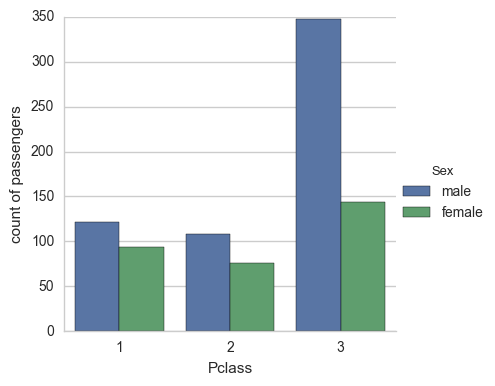

In [80]:
##Gender distribution by class

gender_class= sea.factorplot('Pclass',order=[1,2,3], data=titanic_ds, hue='Sex', kind='count')
gender_class.set_ylabels("count of passengers")

To begin answering my first question of who has a higer probability of surviving I created two variables, men_prob and women_prob. From there I grouped by sex and survival then taking the mean and thn printing out each statement. 

In [76]:
##Probability of Survival by Gender

men_prob = men_ds.groupby('Sex').Survived.mean()
women_prob = women_ds.groupby('Sex').Survived.mean()

print("Male ability to survive: ")
print(men_prob[0])

print("Women ability to survive: ")
print(women_prob[0])

Male ability to survive: 
0.188908145581
Women ability to survive: 
0.742038216561


To visually answer the questions of what sex had a higher probability of surviving I utitlized the factorplot function with seaborn to map the sex, and survived in the form of a bar graph. I also incudled a y-axis label for presentaiton.

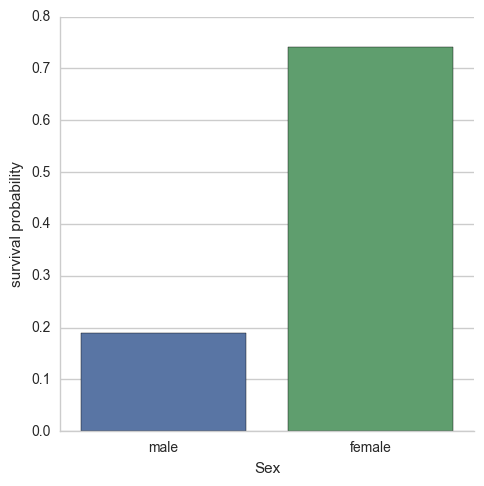

In [77]:
sbg = sea.factorplot("Sex", "Survived", data=titanic_ds, kind="bar", ci=None, size=5)
sbg.set_ylabels("survival probability")

To answer my section question of what the age range range was of survivors vs. non-survivors I first wanted to see the distribution of age acorss the board. To do this I used the histogram function as well as printed the median age. 

Median Age: 
28.0


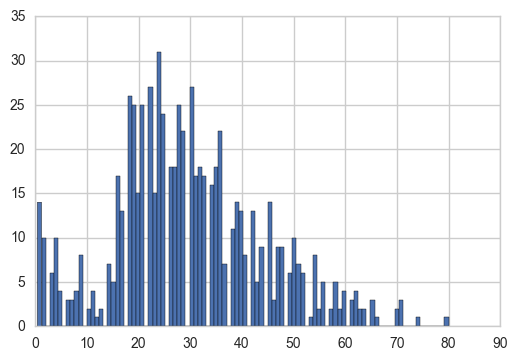

In [68]:
##Distribution of age; Median age 28.0
titanic_ds['Age'].hist(bins=100)
print ("Median Age: ")
print titanic_ds['Age'].median()

To answer my second questoins I showed survived data with age in a box plot to show average age as well as its distruvtion for both deseased and survived.

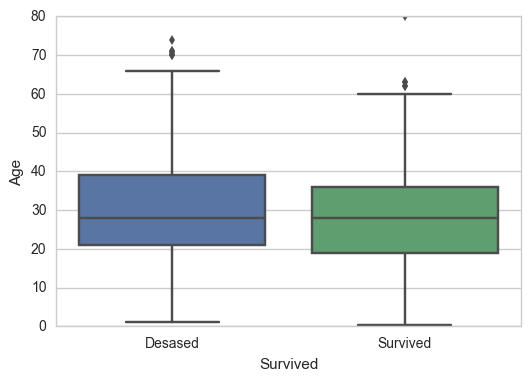

In [61]:
##Age box plot, survived and did not survive
##fewer people survived as compared to deseased 

age_box=sea.boxplot(x="Survived", y="Age", data=titanic_ds)
age_box.set(xlabel = 'Survived', ylabel = 'Age', xticklabels = ['Desased', 'Survived'])

To tackle the third question of what is the probability as well as who has a higher probability of survivng, being Alone or in a Family. I first went ahead and greated my function that would return True if the number of people reported was above 0 (Family) and Fale if it was not (Alone). Bellow you can see the function as well as the new column crated with the True and False statements. 

In [16]:
titanic_ds['Family']=(titanic_ds.SibSp + titanic_ds.Parch > 0)
print titanic_ds.head()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked family Family  
0      0         A/5 21171   7.2500   NaN        S   True   True  
1      0          PC 17599  71.2833   C85        C   True   True  
2      0  STON/O2. 3101282   7.9250   NaN        S  False  False  
3      0            113803  53.1000  C123        S  

To now show the probability visually as well as its output I have gone ahead and created a factorplot as well as printed out the probabilities of the two (Alone = False and Family = True). To get the probabilities I had to divide the sum of survivors by family type and divide by the count of family type. 

Family
False    0.303538
True     0.505650
Name: Survived, dtype: float64


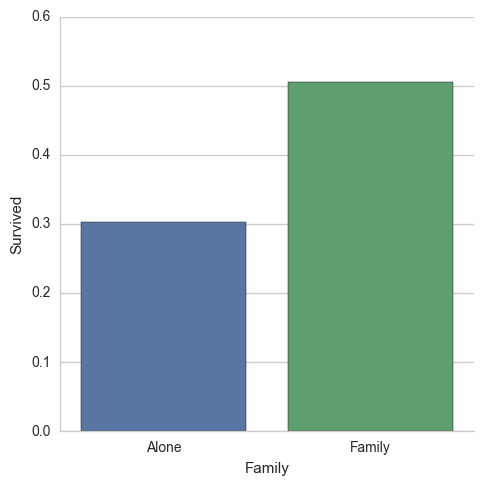

In [33]:
fanda = sea.factorplot('Family', "Survived", data=titanic_ds, kind='bar', ci=None, size=5)
fanda.set(xticklabels = ['Alone', 'Family'])
print ((titanic_ds.groupby('Family')['Survived'].sum()/titanic_ds.groupby('Family')['Survived'].count()))

Finally, to answer my last question of if being in a higher class affected the probability of you surviving, I used the same seaborn factorplot but to create this graph i had to take the sum of survivors and divide them by the count of survivors in each class. 

Class Survivability: 
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


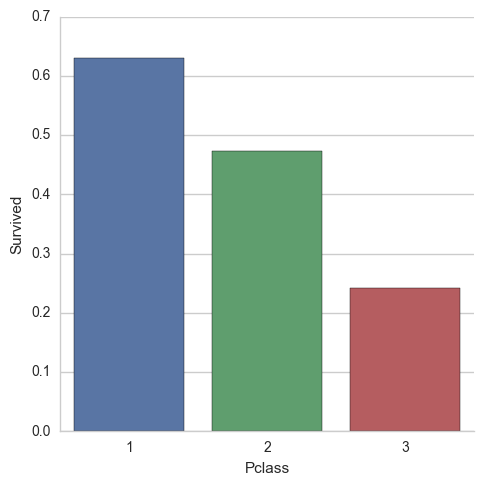

In [32]:
sea.factorplot('Pclass', "Survived", data=titanic_ds, kind='bar', ci=None, size=5)

PS=(titanic_ds.groupby('Pclass')['Survived'].sum())
PC=(titanic_ds.groupby('Pclass')['Survived'].count())
print ("Class Survivability: ")
print (PS/PC)

# Conclusion 

    1) There we a total of 577 males and 314 females on the boat. From those totals I was able to dervice that females had a higher probablity of surviving as compared to male. Females had 74.20% probably of surviving as compared to Males who had a 18.89%. 
    2) The median age on the boat was 28 years old and that did not change dramtically when I looked at the ages of survivors vs. those who didn't. I did obvser that a greater number of older indviduals, those over 40, did not surive and while the number of survivors were much less then those who didnt its interesting to see the distribution.
    3) When looking at whether being in a family meant a higher probability of surving as compared to being alone we can see that being in a family had a 50.56% probably of surviving as compared to 30.35% if the individual were alone. 
    4) Finally I looked at if being in a higher class meant a higher probabilty of living and as my data showed being in Class 1 meant a 62.96% of surviving as compared to 47.28% and 24.23% for Class 2 and 3.

So what does this all mean? Well the simpliest way to put it is that if you are a Female, with a family, in your 20's and in first class, you probably survied the tragedy and made it out on a life boat. Femailes and families surviving are fairly obvious points as they did not want to break up families in their persuit out as well Women and Children are prodominitly seen as priorities in times of emergency. The conclusion on class having an affect is also a clear indiciation of the times and "value" of individuals in that socioeconomic conditition. Higher ranked individuals were able to not only gain quicker access but increased access to saftey as they potentially had the means to sway decisons.